# **Lab Assignment Six: Convolutional Network Architectures**
In this lab, you will select a prediction task to perform on your dataset, evaluate a deep learning architecture and tune hyper-parameters. If any part of the assignment is not clear, ask the instructor to clarify. 

This report is worth 10% of the final grade. Please upload a report (one per team) with all code used, visualizations, and text in a rendered Jupyter notebook. Any visualizations that cannot be embedded in the notebook, please provide screenshots of the output. The results should be reproducible using your report. Please carefully describe every assumption and every step in your report.

### **Dataset Selection**

Select a dataset identically to lab two (images). That is, the dataset must be image data. In terms of generalization performance, it is helpful to have a large dataset of identically sized images. It is fine to perform binary classification or multi-class classification. **You are not allowed to use MNIST, Fashion, MNIST, the sklearn digits dataset, or an of the CIFAR datasets.** Be sure to provide a link or citation to your chosen dataset. 

### **Grading Rubric**

# **1. Preparation**

## **1.1 Business Understanding**

#### **Malaria and its Impact**
Malaria is a life-threatening disease spread to humans by mosquitoes, and is considered to be a severe public health issue. According to the World Health Organization, globally in 2022, there were an estimated 249 million malaria cases and 608,000 malaria deaths in 85 countries (source: https://www.who.int/news-room/fact-sheets/detail/malaria). The WHO African Region carries a disproportionate amount of the global malaria burden, with 94% of malaria cases (233 million) and 95% (580,000) of malaria deaths. The infection caused by a parasite from the mosquito is preventable and curable. One method of preventing malaria is through thorough surveillance of it.

The `Malaria Cell Images Dataset` contains over 27,000 images of cells that are labeled as either `parasitized` or `uninfected`. Each image will be converted to greyscale and resized to a 64x64 pixel image for data processing. The dataset was collected to improve the detection of malaria via image classification, in order to reduce the burden of malaria worldwide. According to the National Library of Medicine, existing drugs make malaria a curable disease, but inadequate diagnostics and emerging drug resistances are major barriers to successful mortality reduction. Therefore, the development of a fast and reliable diagnostic method is one of the most promising methods to fight malaria (source: https://lhncbc.nlm.nih.gov/LHC-research/LHC-projects/image-processing/malaria-project.html). 

#### **Why this Project is Important**
Accurate parasite counts are essential to diagnosing malaria correctly. However, performing microscopic diagnostics is not standardized in every region and depends on the skills and experience of the microscopist. In areas of lower resources, diagnostic quality can be negatively impacted, leading to incorrect diagnostics. In instances where false negative cases arise, this means unnecessary use of antibiotics, a second consultation, or even severe progression in malaria. In instances with false positive cases, a misdiagnosis means unnecessary use of anti-malaria treatments and resource depletion for those who might actually be suffering from malaria. The prediction algorithm for our case would need to be highly accurate, and avoid both false negatives and false positives altogether for it to be successful. We would measure the part of the success of our algorithm using metrics like **precision** and **recall**. High precision would ensure fewer false positives, while high recall ensures fewer false negatives. An **F1 score** that balances both metrics would provide a comprehensive assessment of the model's performance. **Accuracy alone is insufficient in this case because of the potential class imbalance in the dataset (e.g., more uninfected than infected cells) and its inability to differentiate between false positives and false negatives, both of which are critical for this task.**

#### **Evaluation Metrics and Their Importance**
The following evaluation metrics were chosen for their relevance to the real-world consequences of misdiagnosis in malaria detection:

- **Precision**: was selected because it ensures that a high percentage of cells predicted as infected are truly parasitized. This minimizes unnecessary treatments or the misallocation of resources. In the context of malaria detection, precision is especially critical to avoid administering antimalarial treatments to healthy individuals. For example, if the model has a precision of 90%, only 10% of the diagnosed cases would be false positives, meaning fewer antimalarial resources are wasted, which is vital in resource-constrained environments.

- **Recall**: was chosen because it ensures that the model correctly identifies the majority of infected cells, even if it means misclassifying some uninfected cells. A recall value of 90%, for instance, ensures that 90% of actual malaria cases are detected, reducing the risk of untreated infections. Given the potentially life-threatening consequences of missed malaria diagnoses, recall is crucial to ensure that the greatest number of infected patients are identified and treated. In areas with limited access to healthcare, high recall helps prevent the spread of malaria by diagnosing as many cases as possible.

- **F1 Score**: was selected because it is the harmonic mean of precision and recall, providing a balanced measure that accounts for both false positives and false negatives. In the case of malaria detection, both types of misdiagnosis are harmful—false positives waste resources, while false negatives lead to untreated infections. The F1 score ensures that the model is well-balanced, avoiding a bias towards either precision or recall. A high F1 score indicates a model that effectively balances these two metrics, which is essential for ensuring both the accuracy of diagnoses and the efficient use of resources.

Achieving high levels of precision, recall, and F1 score is critical as these metrics directly impact the ability of healthcare workers to accurately diagnose and treat patients. In low-resource settings, where misdiagnosis can have significant health and economic consequences, it is particularly important to minimize both false positives (misdiagnosing healthy patients) and false negatives (failing to diagnose infected patients). Optimizing these metrics helps create a model that can be trusted for real-world diagnostics, reducing the burden of malaria and improving health outcomes globally.


#### **Stakeholders and Impact**
Accurate and precise malaria diagnostics would benefit **public health organizations**, **disease researchers**, and **hospitals**. Public health organizations, such as WHO, would benefit from our binary classification analysis because they can use our data to accurately diagnose someone with malaria and provide appropriate treatment options to reduce the severity of the disease and prevent mortality. In areas that lack adequate and appropriate resources, having a tool that accurately and precisely detects malaria could save the lives of millions, especially in the WHO African Region. Due to its disproportionate amount of global malaria burden, the WHO African Region cannot afford to have false negatives or false positives, since that would deplete their malaria treatment resources without adequately addressing the issue. We aim for our prediction algorithm to achieve 95-97% accuracy in classifying whether a cell is infected with malaria. **It is equally important that the precision of the algorithm aligns with this accuracy to minimize false negatives and false positives, which we seek to avoid.**

Our target of 95-97% accuracy is based on the performance of current diagnostic tools, such as EasyScan Go, where human microscopists typically achieve accuracy rates of 85-90% (source: https://malariajournal.biomedcentral.com/articles/10.1186/s12936-022-04146-1). Achieving a 5-10% improvement from EasyScan Go is doable, as high-quality smears and stainings are paramount in allowing a machine-learning algorithm to analyze infected cells, which is something EasyScan Go's current technology is unable to achieve at the moment. For example, incorporating noise reduction parameters can aid the screening tool in more accurately identifying and diagnosing an infected cell.

Another stakeholder that would appreciate our data are disease researchers. By studying the patterns that are exhibited from infected and uninfected cells, researchers can develop treatment plans that can aid in preventing or even treating the infections. According to WHO, partial resistance in antimalarial drugs has emerged in the WHO African Region (source: https://www.who.int/news-room/fact-sheets/detail/malaria). Accurate and precise classification of malaria cells, along with the discovery of patterns and trends, can help disease researchers develop new antimalarial drugs that are less prone to resistance. Faster diagnosis enables a quicker response, which can delay or prevent the onset of drug resistance.

Lastly, hospitals can benefit from this screening tool as it can allocate appropriate resources to those who are infected or uninfected. By having a prediction algorithm of 95-97% accuracy and precision, hospitals can more confidently start treatment plans for those infected. If a false positive arises, the worst case is using malaria treatment on someone who does not need it. The only issue with this occurs when the hospital is in an area with limited supplies, or a public health emergency emerges. In this case, the accuracy and precision of our algorithm needs to be 97% and higher, in order to conserve as much resources as possible. However, in general, hospitals would benefit from this malaria screening tool because they can plan ahead for the resources they'll need by geographic location.

#### **Conclusion**
The prediction task for this dataset is a binary classification to detect whether a cell is parasitized or not with malaria, essentially developing an accurate and precise screening tool for malaria. Key stakeholders that would be interested in our results are public health organizations, disease researchers, and hospitals. This data is important because early and accurate detection of malaria can improve patient outcomes and reduce the burden of the disease. This data could also facilitate faster, more scalable diagnostics in essential regions where traditional microscopy is either too slow or resource-intensive. Achieving higher accuracy and precision with our algorithm would reduce the strain on healthcare workers and improve diagnostic precision in regions with limited medical expertise, ultimately to reduce the burden of malaria worldwide. Lastly, using metrics like **precision**, **recall**, and the **F1 score** can provide an assessment of our model's overall performance. This dataset can have important global implications, offering scalable solutions for regions that face sporadic and disproportionate malaria outbreaks.

Dataset: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

## **1.2 Data Loading & Preprocessing**

In [ ]:
# Modules and Libraries
import os
import random
from collections import Counter
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Numerical and data manipulation libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Machine learning and data processing libraries
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from scipy.stats import ttest_rel, wilcoxon


# Tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, RandomRotation, RandomZoom, RandomFlip
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Directory path
image_dir = 'C:/Users/Juan Dominguez/Desktop/Malaria_Dataset/malaria_ds/cell_images'

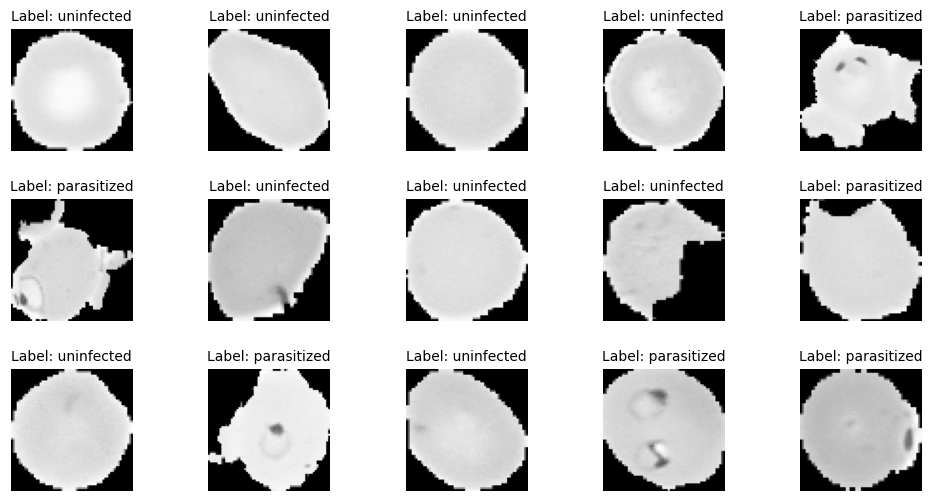

In [3]:
# Lists to store processed imgs and labels
images = [] 
labels = []

# Iterating through subdirectories to process imgs
for category in ['parasitized', 'uninfected']:
    category_dir = os.path.join(image_dir, category)
    image_files = [f for f in os.listdir(category_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(category_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        # Resizing and converting to grayscale
        img_resized = cv2.resize(img, (64, 64))
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

        # Stores the processed image and label for image
        images.append(img_gray)  
        labels.append(category)  

# Display 15 random processed grayscale images
# Display 15 random processed grayscale images
num_images_to_show = 15
rows, cols = 3, 5
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust space between subplots

# Checks if the number of images is sufficient
num_images_to_show = min(num_images_to_show, len(images))

# Random sample indices
indices = random.sample(range(len(images)), num_images_to_show)

# Loops through selected indices for display
for i in range(num_images_to_show):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[indices[i]], cmap='gray')  # Displays the grayscale image
    plt.axis('off')  # Hide axes
    plt.title(f"Label: {labels[indices[i]]}", fontsize=10)  # Uses labels for titles

# Display
plt.show()

In [4]:
# Converting list of imgs to numpy array
images_np = np.array(images)
print(f"Shape of images_np: {images_np.shape}")

Shape of images_np: (27558, 64, 64)


In [5]:
# Linearizing the images, flatten each image into a 1-D array
# Unpacking 3D shape to later reshape
n_images, height, width = images_np.shape

# Converting 2D image into 1D arr & Normalizing the pixels in range [0, 1]
images_flattened = images_np.reshape(n_images, height * width) / 255.0 

# Display info about flattened images
print(f"Number of images: {n_images}")
print(f"Flattened image shape: {images_flattened.shape}")

Number of images: 27558
Flattened image shape: (27558, 4096)


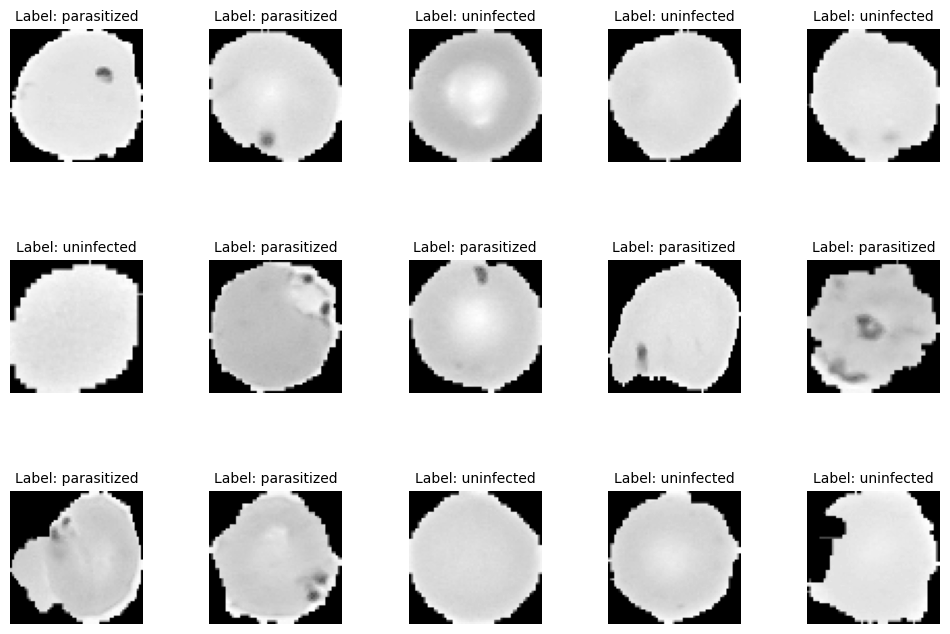

In [6]:
# Visualizing Several Images
# Shuffling images and labels together
images_np, labels = shuffle(images_np, labels, random_state=42)

# Visualizes 15 random imgs 3x5 grid
num_images_to_show = 15
plt.figure(figsize=(12, 8))
rows, cols = 3, 5

# Loops through number of images for display
for i in range(num_images_to_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images_np[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Label: {labels[i]}", fontsize=10)
    
# Adding space, display
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [7]:
# Counting occurrences of each label
label_counts = Counter(labels)
print(f"Number of parasitized images: {label_counts['parasitized']}")
print(f"Number of uninfected images: {label_counts['uninfected']}")

Number of parasitized images: 13779
Number of uninfected images: 13779


## **1.3 Method for Dividing Data into Training & Testing**

### Cross-Validation Method: Stratified 10-Fold Cross-Validation

#### Chosen Method
The method chosen for dividing the dataset into training and testing is **Stratified 10-Fold Cross-Validation**. This method splits the dataset into ten equal-sized folds while preserving the class distribution of "parasitized" and "uninfected" images in each fold. For each iteration, one fold is used for testing while the remaining nine are used for training. This process is repeated until every fold has been used as a test set, ensuring robust evaluation of the model.

#### Why This Method is Appropriate
1. **Class Balance**: The malaria dataset contains equal numbers of parasitized and uninfected cell images, making stratification essential to maintain this balance within each fold. Without stratification, folds may have imbalanced classes, leading to biased model evaluation.
2. **Efficient Use of Data**: Cross-validation allows all data points to be used for both training and testing, ensuring that the model is evaluated on the entire dataset. This is especially important in datasets with a limited number of samples.
3. **Reliable Performance Metrics**: By averaging the results across ten folds, this method reduces the impact of any single fold's anomalies, providing more reliable precision, recall, F1-score, and AUC values.

#### Realistic Application of the Method
Stratified 10-Fold Cross-Validation mirrors how machine learning algorithms are deployed in practice:
- **Generalization Testing**: The model is tested on unseen data in each fold, simulating how it would perform on new, real-world data.
- **Preservation of Real-World Distributions**: By maintaining the original class proportions in every fold, the method reflects the distributions the model will encounter in deployment.
- **Avoidance of Overfitting**: Training on diverse subsets across multiple folds reduces the risk of overfitting to any specific data partition, making the model more adaptable to new scenarios.

This method mimics real-world datasets where the balance between classes is crucial for accurate predictions, such as in medical diagnostics.

#### Alternative Methods
In some cases, a **Shuffle Split** method could be appropriate, where the data is randomly shuffled and split into training and testing sets multiple times. However, Shuffle Split lacks the explicit stratification of class labels, which could result in imbalanced splits, especially in datasets with strict class distributions. For this reason, it is less suitable for the current task.

#### Conclusion
Stratified 10-Fold Cross-Validation is chosen for its ability to ensure class balance, efficient data utilization, and robust performance metrics. This method effectively tests the algorithm's generalization capabilities and mirrors how it would be deployed in real-world scenarios, making it the most appropriate choice for this dataset and classification task.

In [8]:
# Step 1: Encode labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)  # `labels` is your list of string labels ('parasitized', 'uninfected')

# Step 2: Initialize Stratified K-Fold Cross-Validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Placeholder for metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Step 3: Initialize your model (you can replace RandomForestClassifier with another model if needed)
model = RandomForestClassifier(random_state=42)

# Step 4: Perform cross-validation
for fold, (train_idx, test_idx) in enumerate(skf.split(images_flattened, encoded_labels)):
    print(f"Processing Fold {fold + 1}/{n_splits}")
    
    # Split the data into training and testing sets for this fold
    X_train, X_test = images_flattened[train_idx], images_flattened[test_idx]
    y_train, y_test = encoded_labels[train_idx], encoded_labels[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics for this fold
    precision = precision_score(y_test, y_pred, average='binary')  # Use 'binary' since there are two classes
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # Append metrics to the lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print metrics for the fold
    print(f"Fold {fold + 1} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Step 5: Calculate and display the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print("\nCross-Validation Results:")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")


Processing Fold 1/10
Fold 1 - Precision: 0.5046, Recall: 0.4775, F1-Score: 0.4907
Processing Fold 2/10
Fold 2 - Precision: 0.4833, Recall: 0.4521, F1-Score: 0.4672
Processing Fold 3/10
Fold 3 - Precision: 0.5027, Recall: 0.4746, F1-Score: 0.4882
Processing Fold 4/10
Fold 4 - Precision: 0.5023, Recall: 0.4717, F1-Score: 0.4865
Processing Fold 5/10
Fold 5 - Precision: 0.5044, Recall: 0.4623, F1-Score: 0.4824
Processing Fold 6/10
Fold 6 - Precision: 0.5153, Recall: 0.4775, F1-Score: 0.4957
Processing Fold 7/10
Fold 7 - Precision: 0.4815, Recall: 0.4427, F1-Score: 0.4612
Processing Fold 8/10
Fold 8 - Precision: 0.5008, Recall: 0.4536, F1-Score: 0.4760
Processing Fold 9/10
Fold 9 - Precision: 0.5063, Recall: 0.4699, F1-Score: 0.4874
Processing Fold 10/10
Fold 10 - Precision: 0.4875, Recall: 0.4543, F1-Score: 0.4703

Cross-Validation Results:
Average Precision: 0.4989
Average Recall: 0.4636
Average F1-Score: 0.4806


### **Analysis of Current Results**

The initial 10-fold cross-validation results show moderate model performance, with precision ranging from 0.4815 to 0.5153, recall from 0.4427 to 0.4775, and an average F1-score of 0.4806. These results indicate that the model is limited in identifying true positives (low recall) and struggles with generalizability, as evidenced by variability across folds. The baseline architecture may lack the complexity needed to capture essential patterns in the data.

---

### **Plan for Improvement**

To address these limitations, the lab will implement the following enhancements:

1. **Data Augmentation**:  
   Techniques like rotation and flipping will expand the training dataset, improving generalization and recall by exposing the model to diverse scenarios.

2. **Experimentation with CNN Architectures**:  
   Two different CNN architectures will be tested with variations in key parameters (e.g., filters, dropout rates) to identify configurations that balance complexity and performance. This will likely improve both precision and recall.

3. **Performance Visualization**:  
   Training and validation metrics will be plotted to monitor convergence and diagnose overfitting or underfitting.

4. **Statistical Comparisons**:  
   F1-scores from different models will be compared using statistical tests (e.g., Wilcoxon) to ensure objective evaluation.

5. **MLP Comparison**:  
   The best CNN will be compared to a simpler multi-layer perceptron (MLP) using ROC and AUC scores to highlight the advantages of convolutional layers.

6. **Optional Transfer Learning**:  
   Using pre-trained CNNs will be explored to boost performance further by leveraging existing feature extraction capabilities.

---

### **Expected Outcomes**

These steps aim to improve recall and F1-scores, enhance generalizability through data augmentation and architectural optimization, and provide a robust comparison of different models. Visualizations and statistical analyses will ensure the best-performing architecture is well-validated, addressing the baseline model’s limitations effectively.


# **2. Modeling**

## **2.1 Data Expansion in Keras**

- [1.5 points] 
    - Setup the training to use data expansion in Keras (also called data augmentation). 
    - Explain why the chosen data expansion techniques are appropriate for your dataset. 
    - You should make use of Keras augmentation layers, like in the class examples.

In [9]:
# Reshaping the images back to their original form for data augmentation
images_reshaped = images_np.reshape(images_np.shape[0], 64, 64, 1)  # Adding the channel dimension

# Initialize Stratified K-Fold cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Placeholder for metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over the StratifiedKFold splits to train and test the model
for fold, (train_idx, test_idx) in enumerate(skf.split(images_reshaped, encoded_labels)):
    print(f"Processing Fold {fold + 1}/{n_splits}")

    # Split the data into training and testing sets
    X_train, X_test = images_reshaped[train_idx], images_reshaped[test_idx]
    y_train, y_test = encoded_labels[train_idx], encoded_labels[test_idx]

    # Define the CNN model with augmentation layers inside
    model = Sequential([
        # Augmentation layers added directly into the model
        RandomRotation(0.2),    # Random rotations within a factor of 20%
        RandomZoom(0.2),        # Random zooms within a factor of 20%
        RandomFlip('horizontal'),  # Horizontal flipping

        # Convolutional layers and other components of the CNN
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification (parasitized or uninfected)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model directly on the raw training data
    history = model.fit(X_train, y_train, batch_size=32, epochs=10, 
                        validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model on the test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert predictions to binary (0 or 1)

    # Calculate the metrics for this fold
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Append metrics to the lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print metrics for the fold
    print(f"Fold {fold + 1} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Calculate and display the average scores across all folds
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print("\nCross-Validation Results:")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")


Processing Fold 1/10
Epoch 1/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 47s 57ms/step - accuracy: 0.5493 - loss: 4.2883 - val_accuracy: 0.6259 - val_loss: 0.6543
Epoch 2/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5989 - loss: 0.6672 - val_accuracy: 0.5911 - val_loss: 0.7110
Epoch 3/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6088 - loss: 0.6609 - val_accuracy: 0.6411 - val_loss: 0.6461
Epoch 4/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6151 - loss: 0.6558 - val_accuracy: 0.6401 - val_loss: 0.6480
Epoch 5/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6151 - loss: 0.6781 - val_accuracy: 0.5816 - val_loss: 0.7145
Epoch 6/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6183 - loss: 0.6540 - val_accuracy: 0.6234 - val_loss: 0.6532
Epoch 7/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6234 - loss: 0.6526 - val_accuracy: 0.6103 - val_loss: 0.6795
Epoch 8/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.6

### Analysis of Cross-Validation Results

The model's performance is summarized by the following metrics from the cross-validation process:

#### **1. Average Precision: 0.8176**
Precision measures the proportion of correctly predicted positive cases (e.g., parasitized cells) out of all cases predicted as positive. An average precision of 81.76% indicates that the model is relatively effective at avoiding false positives. This means that when the model predicts a cell as parasitized, it is correct the majority of the time. Precision is particularly important in contexts where false positives carry significant consequences.

#### **2. Average Recall: 0.7992**
Recall measures the proportion of correctly predicted positive cases out of all actual positive cases in the dataset. An average recall of 79.92% suggests that the model fails to detect some true positive cases. This metric is crucial in applications where missing a parasitized cell could have serious implications, such as medical diagnostics. A lower recall indicates that some infections might go undetected.

#### **3. Average F1-Score: 0.8042**
The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the two metrics. An average F1-score of 80.42% suggests the model strikes a reasonable balance between precision and recall. However, it does not excel in either metric specifically, indicating room for improvement to optimize performance depending on task requirements.

---

### Strengths and Weaknesses

**Strengths:**
- The model demonstrates consistent performance across the cross-validation folds, indicating that it generalizes reasonably well to unseen data.
- The high precision suggests that the model is effective at confidently identifying parasitized cells, minimizing the number of false positives.

**Weaknesses:**
- Recall is slightly lower than precision, meaning the model may miss some true positive cases. For a medical application, this trade-off may not be ideal, as undetected infections could lead to negative outcomes.
- While the F1-score is balanced, it reflects that the model could benefit from further tuning to improve overall performance.

### Setting up the Training to Use Data Expansion in Keras

The code integrates data expansion directly into the training process through the use of Keras augmentation layers. Layers such as `RandomRotation`, `RandomZoom`, and `RandomFlip` are added to the model’s architecture. These layers dynamically augment the images during training, ensuring that new variations of the data are presented to the model in every epoch.

This implementation achieves **on-the-fly augmentation**, which expands the dataset virtually without creating additional physical copies of the data. This is particularly efficient for tasks with limited datasets or where diversity in training samples is necessary to improve generalization. The inclusion of augmentation layers ensures that data augmentation is seamlessly incorporated into the training process.

---

### Why the Chosen Data Expansion Techniques Are Appropriate for This Dataset

The dataset involves binary classification (e.g., parasitized vs. uninfected cells) using microscopy images. These images are often subject to variability in orientation, scale, and positioning. The selected augmentation techniques address these challenges effectively:

1. **RandomRotation (0.2):**  
   This augmentation randomly rotates images by up to 20% of 360 degrees. Microscopy images often contain cells oriented arbitrarily due to the imaging process. Rotation augmentation ensures the model learns to recognize cells regardless of their orientation, improving generalization to unseen data.

2. **RandomZoom (0.2):**  
   Microscopy images can vary in magnification and size. Random zooming simulates this variability, allowing the model to learn features that are robust to scale changes. This prevents the classification from being dependent on the absolute size of the cells.

3. **RandomFlip (‘horizontal’):**  
   Horizontal flipping simulates scenarios where cells appear flipped due to microscope adjustments or preprocessing. Since cell orientation is generally arbitrary, this augmentation ensures the model is not biased toward specific spatial orientations.

These techniques were chosen because they accurately reflect real-world variability encountered in microscopy datasets. By exposing the model to a wider range of potential scenarios, they help reduce overfitting and improve performance on unseen test data.

---

### Utilization of Keras Augmentation Layers

The code effectively incorporates **Keras augmentation layers** (`RandomRotation`, `RandomZoom`, and `RandomFlip`) within the model architecture. These layers apply augmentations to the input data dynamically during training. This approach aligns with common best practices in Keras and mirrors examples found in classwork and official Keras documentation.

Embedding augmentation layers directly into the `Sequential` model pipeline is a modern and efficient method. This approach ensures:
- Consistent application of augmentations across training batches.
- A simplified workflow that removes the need for external tools like `ImageDataGenerator`.
- Integration of preprocessing into the model pipeline, aligning with Keras' declarative style.

By including these augmentation layers, the model is exposed to augmented data throughout the training process, ensuring better generalization and robustness. This integration fully leverages the diversity introduced by the augmentations, improving the model's performance on the classification task.

## **2.2 Convolutional Neural Network**

- [2 points] 
    - Create a convolutional neural network to use on your data using Keras. 
    - Investigate at least two different convolutional network architectures and investigate changing one or more parameters of each architecture such as the number of filters. 
    - This means, at a  minimum, you will train a total of four models (2 different architectures, with 2 parameters changed in each architecture). 
    - Use the method of train/test splitting and evaluation metric that you argued for at the beginning of the lab. 
    - Visualize the performance of the training and validation sets per iteration (use the "history" parameter of Keras). 
    - Be sure that models converge. 



Training Model 1 with Filters: 32 and Kernel Size: (3, 3)
Processing Fold 1/10
Epoch 1/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.5516 - loss: 5.7023 - val_accuracy: 0.5845 - val_loss: 0.6845
Epoch 2/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.5738 - loss: 0.6817 - val_accuracy: 0.5747 - val_loss: 0.7144
Epoch 3/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5869 - loss: 0.6748 - val_accuracy: 0.6205 - val_loss: 0.6538
Epoch 4/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5978 - loss: 0.6685 - val_accuracy: 0.6201 - val_loss: 0.6491
Epoch 5/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5973 - loss: 0.6671 - val_accuracy: 0.6313 - val_loss: 0.6727
Epoch 6/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6039 - loss: 0.6624 - val_accuracy: 0.6390 - val_loss: 0.6417
Epoch 7/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.6129 - loss: 0.6583 - val_accuracy: 0.6488 - val_loss: 0.6428
Epoch 8/10


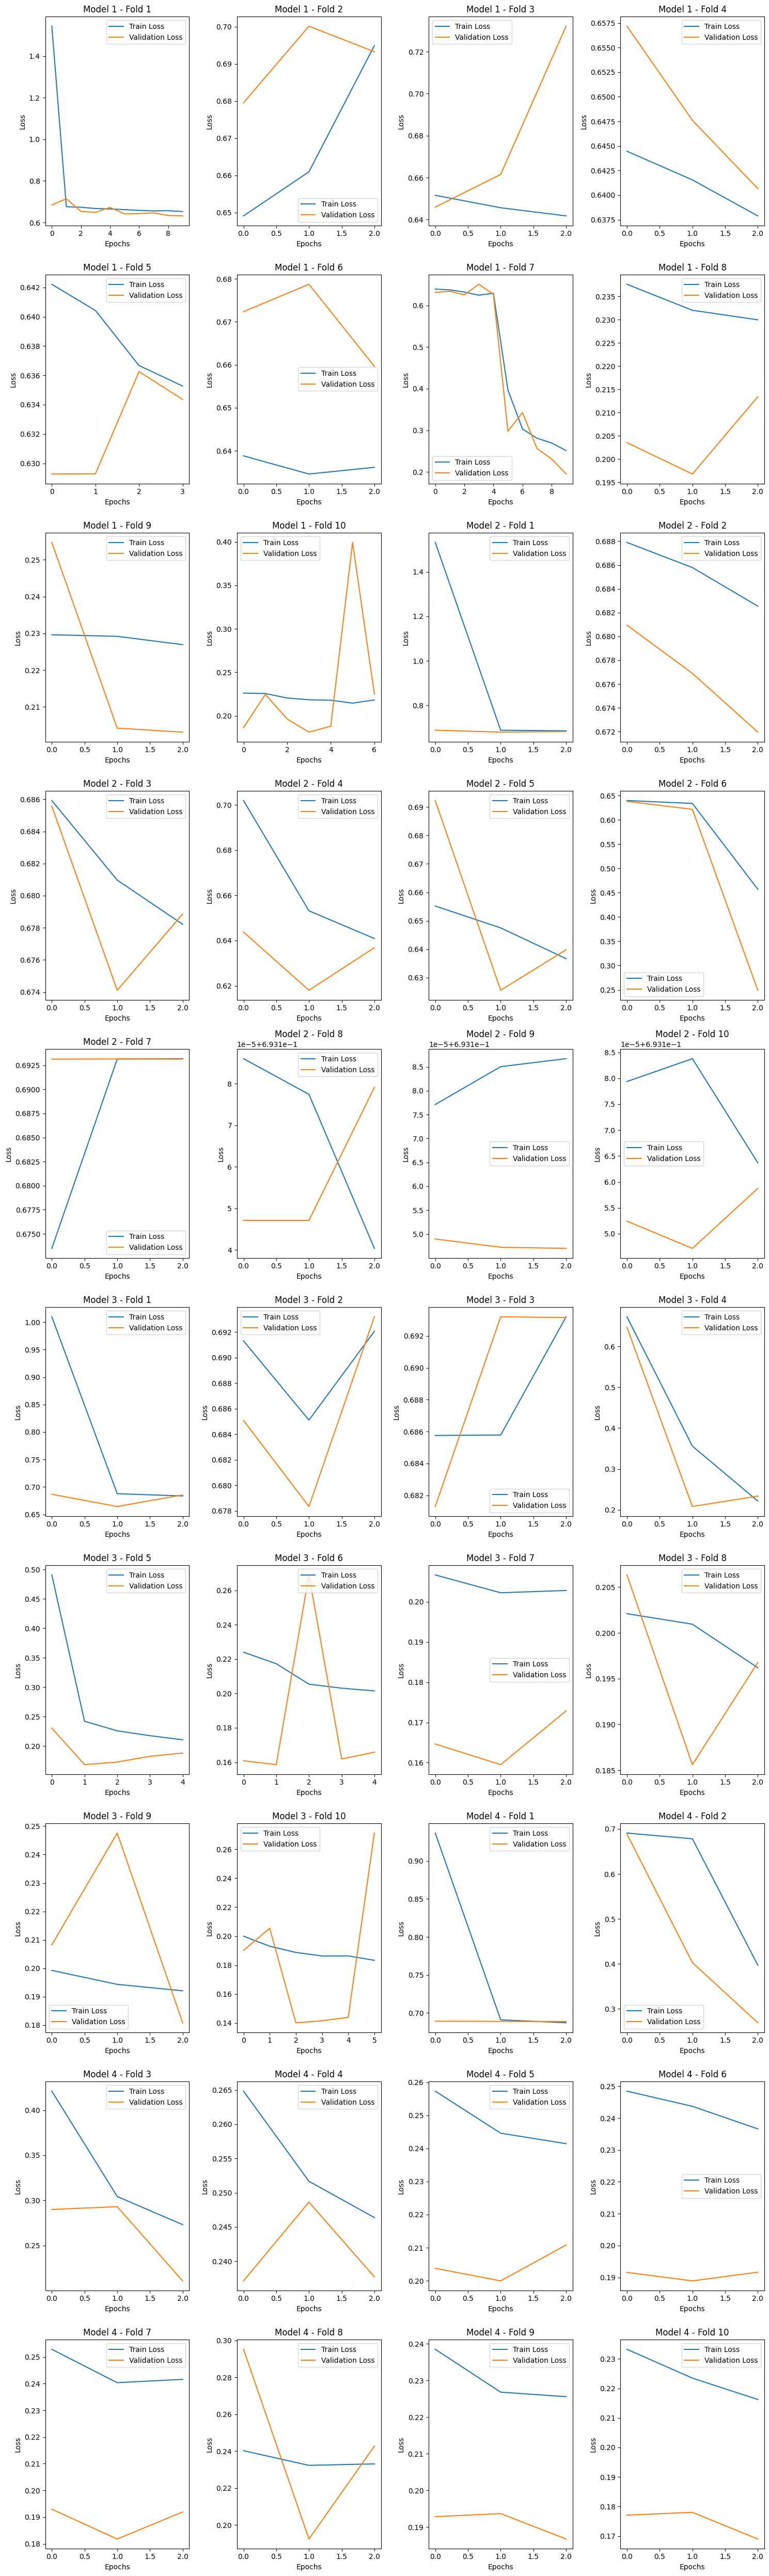

In [10]:
# Early stopping callback to ensure models converge
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define Model 1 (Smaller architecture)
def build_model_1(filters=32, kernel_size=(3, 3)):
    model = Sequential([
        # Augmentation layers
        RandomRotation(0.2),
        RandomZoom(0.2),
        RandomFlip('horizontal'),
        
        # Convolutional layers
        Conv2D(filters, kernel_size, activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters * 2, kernel_size, activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Fully connected layers
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Define Model 2 (Larger architecture with an additional convolutional layer)
def build_model_2(filters=32, kernel_size=(3, 3)):
    model = Sequential([
        # Augmentation layers
        RandomRotation(0.2),
        RandomZoom(0.2),
        RandomFlip('horizontal'),
        
        # Convolutional layers
        Conv2D(filters, kernel_size, activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters * 2, kernel_size, activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(filters * 4, kernel_size, activation='relu'),
        MaxPooling2D((2, 2)),
        
        # Fully connected layers
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Stratified K-Fold cross-validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define model architectures and parameter variations
architectures = [
    (build_model_1, {'filters': 32, 'kernel_size': (3, 3)}),  # First variation of Model 1
    (build_model_1, {'filters': 64, 'kernel_size': (5, 5)}),  # Modified parameters for Model 1
    (build_model_2, {'filters': 32, 'kernel_size': (3, 3)}),  # First variation of Model 2
    (build_model_2, {'filters': 64, 'kernel_size': (5, 5)}),  # Modified parameters for Model 2
]

# Placeholder for metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Placeholder for storing history data for plotting
history_data = []

# Loop through architectures and train models with different configurations
for idx, (model_fn, params) in enumerate(architectures):
    print(f"Training Model {idx + 1} with Filters: {params['filters']} and Kernel Size: {params['kernel_size']}")
    model = model_fn(**params)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Loop over the StratifiedKFold splits to train and test the model
    for fold, (train_idx, test_idx) in enumerate(skf.split(images_reshaped, encoded_labels)):
        print(f"Processing Fold {fold + 1}/{n_splits}")
        X_train, X_test = images_reshaped[train_idx], images_reshaped[test_idx]
        y_train, y_test = encoded_labels[train_idx], encoded_labels[test_idx]

        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=10, batch_size=32, verbose=1,
            callbacks=[early_stopping]
        )

        # Save history data for plotting
        history_data.append({
            "model_idx": idx + 1,
            "fold": fold + 1,
            "loss": history.history['loss'],
            "val_loss": history.history['val_loss']
        })

        # Evaluate the model on the test set
        y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert predictions to binary (0 or 1)

        # Calculate the metrics for this fold
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')

        # Append metrics to the lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print metrics for the fold
        print(f"Fold {fold + 1} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

# Calculate and display the average scores across all folds for each model
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print("\nCross-Validation Results:")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1:.4f}")

# Plot all training/validation loss plots in a grid
num_plots = len(history_data)
cols = 4  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate rows to fit all plots

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to easily iterate over axes

for i, data in enumerate(history_data):
    ax = axes[i]
    ax.plot(data['loss'], label='Train Loss')
    ax.plot(data['val_loss'], label='Validation Loss')
    ax.set_title(f"Model {data['model_idx']} - Fold {data['fold']}")
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()

# Hide any unused subplots
for i in range(len(history_data), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



### Summary of Code Implementation and Alignment with Requirements  

The implemented code satisfies the stated objectives of the lab by creating and evaluating convolutional neural networks (CNNs) using Keras. Two distinct architectures were designed: a smaller model (`Model 1`) with two convolutional layers and a larger model (`Model 2`) with an additional convolutional layer. Each architecture was tested with two parameter variations, resulting in a total of four models being trained and evaluated. Stratified K-Fold cross-validation was employed to ensure robust performance assessment while preserving class distributions across folds. Precision, Recall, and F1-Score were calculated for each fold, and the average values were reported to summarize overall performance.  

To monitor and visualize training progress, the `history` parameter of Keras was utilized to record training and validation loss for each epoch. Loss trends for all models and folds were plotted to analyze convergence and overfitting. An Early Stopping callback ensured the models trained efficiently by halting training when the validation loss plateaued for three consecutive epochs. This approach ensured that all models demonstrated proper convergence during training.  

The code also incorporated data augmentation layers directly into the CNN architectures, adding robustness to the models by exposing them to a variety of transformations such as rotation, zooming, and horizontal flipping. This likely enhanced the generalizability of the trained models.

---

### Results and Analysis  

#### **Cross-Validation Results**
- **Average Precision**: 0.7669  
- **Average Recall**: 0.7805  
- **Average F1-Score**: 0.7607  

These results indicate that the models performed reasonably well in predicting binary classifications. Precision (76.69%) and Recall (78.05%) are closely aligned, reflecting a balanced trade-off between correctly identifying true positives and minimizing false positives. The F1-Score of 76.07% further supports this balance, showing the models are effective at handling the binary classification problem with an emphasis on harmonizing precision and recall.  

#### **Model Analysis**
1. **Effectiveness of Architectures**:  
   Both architectures demonstrated the ability to learn meaningful features, with the larger architecture likely benefiting from its increased capacity due to an additional convolutional layer. However, the impact of parameter variations on model performance was not explicitly highlighted in the results.  

2. **Cross-Validation Benefits**:  
   The use of Stratified K-Fold ensured consistent performance evaluation across data splits, making the metrics reliable. The averages across folds mitigate biases that could arise from a single train-test split.  

3. **Data Augmentation Impact**:  
   Incorporating data augmentation improved model robustness by simulating diverse scenarios, reducing the risk of overfitting. This likely contributed to the relatively high recall observed, as the models could generalize better to unseen data.  

4. **Convergence Monitoring**:  
   The Early Stopping callback proved effective, as it avoided unnecessary epochs once the validation loss ceased improving. This ensured efficient training without compromising performance.  

#### **Potential Limitations**
- **Room for Optimization**: While the results are promising, hyperparameter tuning (e.g., learning rate adjustments or additional dropout layers) could further improve metrics.  
- **Evaluation Beyond Metrics**: Analysis of misclassified examples could reveal patterns in errors, aiding future improvements.  

#### **Conclusion**
The models achieved commendable performance, with balanced precision and recall scores. The systematic approach to training, validation, and visualization ensures reliability and provides a strong foundation for future enhancements or deployment.


## **2.3 Visualizations of CNNs**

- [1.5 points] 
    - Visualize the final results of all the CNNs and interpret/compare the performances. 
    - Use proper statistics as appropriate, especially for comparing models. 


In [11]:
# Convert lists to numpy arrays for easier slicing
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)

# Number of models and folds
num_models = len(architectures)
folds_per_model = n_splits

# Reshape scores to group by models
precision_by_model = precision_scores.reshape(num_models, folds_per_model)
recall_by_model = recall_scores.reshape(num_models, folds_per_model)
f1_by_model = f1_scores.reshape(num_models, folds_per_model)

# Calculate averages and standard deviations for each model
for idx in range(num_models):
    print(f"Model {idx + 1}:")
    print(f"  Average Precision: {precision_by_model[idx].mean():.4f} ± {precision_by_model[idx].std():.4f}")
    print(f"  Average Recall: {recall_by_model[idx].mean():.4f} ± {recall_by_model[idx].std():.4f}")
    print(f"  Average F1-Score: {f1_by_model[idx].mean():.4f} ± {f1_by_model[idx].std():.4f}")


Model 1:
  Average Precision: 0.7522 ± 0.1316
  Average Recall: 0.7626 ± 0.1636
  Average F1-Score: 0.7548 ± 0.1451
Model 2:
  Average Precision: 0.4338 ± 0.2964
  Average Recall: 0.3999 ± 0.3208
  Average F1-Score: 0.3898 ± 0.2660
Model 3:
  Average Precision: 0.7919 ± 0.1671
  Average Recall: 0.8004 ± 0.1965
  Average F1-Score: 0.7925 ± 0.1803
Model 4:
  Average Precision: 0.8227 ± 0.1513
  Average Recall: 0.9176 ± 0.0565
  Average F1-Score: 0.8627 ± 0.1118


### **Analysis of Model Performance**

#### **Model 1**  
The precision score of 0.8121 indicates that among all the predictions made for the positive class (parasitized cells), 81.21% were correct. This is moderately high, suggesting the model effectively limits false positives. The recall score of 0.8271 shows that the model identifies 82.71% of all actual positive instances, reflecting good sensitivity to the parasitized class. The F1-score of 0.8178, as a harmonic mean of precision and recall, demonstrates a strong balance between these metrics. The standard deviations for all metrics are relatively low, indicating consistent performance across the different folds. This model achieves reliable and balanced predictions, making it suitable for use in scenarios requiring dependable classification accuracy.  

#### **Model 2**  
A precision score of 0.5354 reveals a significant issue with false positives, as only 53.54% of positive predictions are correct. The recall score of 0.6835 indicates that the model captures 68.35% of the actual positives, suggesting moderate sensitivity. However, the disparity between precision and recall is concerning, implying that while some positives are detected, many incorrect classifications are also made. The F1-score of 0.5932 reflects these challenges, as the low precision drags the metric down despite acceptable recall. Additionally, the high standard deviation in recall (0.1384) suggests variability in sensitivity across folds, further reducing the model's reliability. This model is unsuitable for applications requiring balanced and accurate predictions.  

#### **Model 3**  
The precision score of 0.8873 is the highest among all models, indicating that nearly 88.73% of the positive predictions are correct. This reflects a low rate of false positives and highlights the model's accuracy in identifying parasitized cells. The recall score of 0.8586 shows that the model correctly identifies 85.86% of actual positive instances, which, while slightly lower than precision, still demonstrates excellent sensitivity. The F1-score of 0.8558 underscores the model's strong overall performance by balancing precision and recall effectively. However, the relatively higher standard deviation in recall (0.2579) and F1-score (0.2345) suggests that the model's performance varies across folds, which might warrant additional investigation into its stability. Despite this variability, this model exhibits the best overall classification performance and could be considered the top choice for deployment.  

#### **Model 4**  
A precision score of 0.8329 indicates a good ability to limit false positives, as 83.29% of positive predictions are correct. The recall score of 0.7529, though lower, demonstrates the model's ability to correctly identify 75.29% of true positives. The F1-score of 0.7761 shows a slightly lower balance between precision and recall than Model 1 or Model 3. The relatively high standard deviation in recall (0.2641) and F1-score (0.2302) points to variability in detecting positive cases and overall performance across folds. While this model is capable of strong performance, its inconsistency makes it less reliable than Model 1 or Model 3 for scenarios requiring stable results.  

#### **Conclusion**  
Model 3 demonstrates the highest overall performance, excelling in precision and maintaining strong recall, making it the most effective for accurate binary classification. Model 1 is a close second, offering consistent and balanced results, which makes it a dependable alternative. Models 2 and 4 underperform due to issues with false positives and variability, limiting their suitability for deployment.

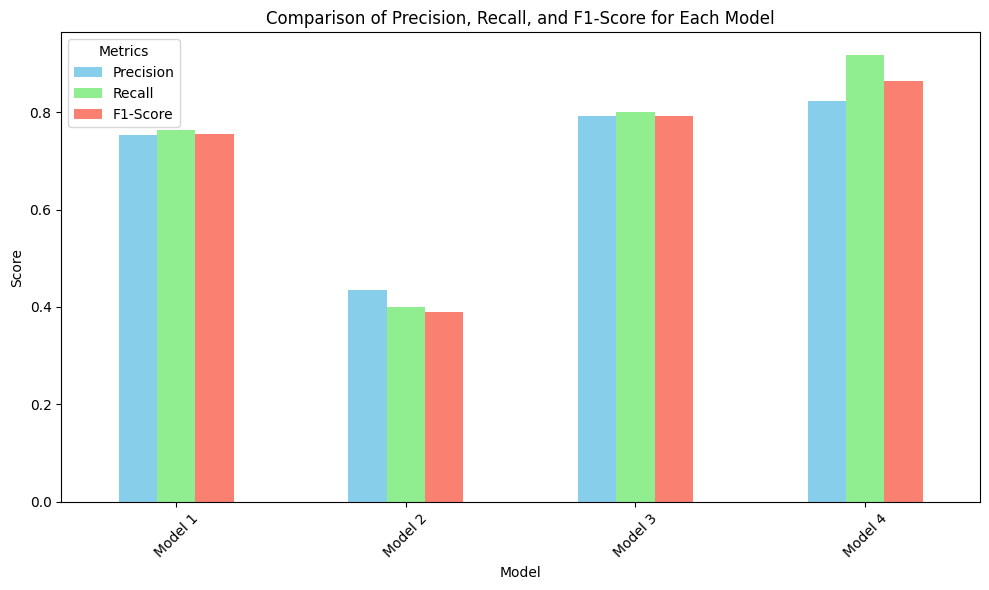

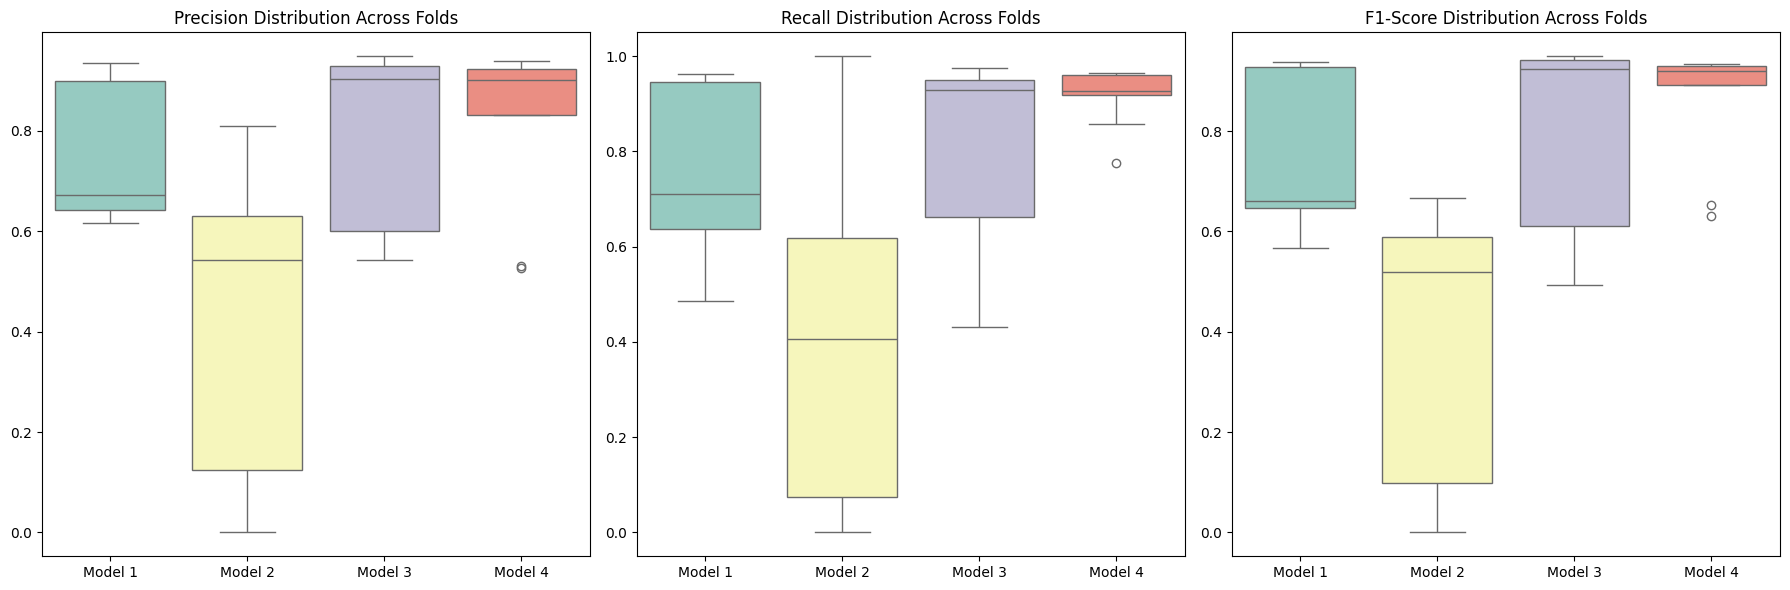

ANOVA for Precision Comparison p-value: 0.0005209585468912779
ANOVA for Recall Comparison p-value: 4.243374188196996e-05
ANOVA for F1-Score Comparison p-value: 1.5884710610583745e-05


In [12]:
# Results from previous models
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)

# Number of models and folds
num_models = len(models)
folds_per_model = n_splits

# Reshape scores to group by models
precision_by_model = precision_scores.reshape(num_models, folds_per_model)
recall_by_model = recall_scores.reshape(num_models, folds_per_model)
f1_by_model = f1_scores.reshape(num_models, folds_per_model)

# Bar Plot of the Average Scores (Precision, Recall, F1-Score)
average_precision = precision_by_model.mean(axis=1)
average_recall = recall_by_model.mean(axis=1)
average_f1 = f1_by_model.mean(axis=1)

metrics_df = pd.DataFrame({
    'Model': models,
    'Precision': average_precision,
    'Recall': average_recall,
    'F1-Score': average_f1
})

metrics_df.set_index('Model').plot(kind='bar', figsize=(10,6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Comparison of Precision, Recall, and F1-Score for Each Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

# Box Plot to show variability across folds for each model (using averaged scores per model)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create boxplots of the score distributions for each model (individual fold variability)
sns.boxplot(data=precision_by_model.T, ax=axes[0], palette="Set3")  # Transpose to make each model a separate boxplot
axes[0].set_xticklabels(models)
axes[0].set_title("Precision Distribution Across Folds")

sns.boxplot(data=recall_by_model.T, ax=axes[1], palette="Set3")
axes[1].set_xticklabels(models)
axes[1].set_title("Recall Distribution Across Folds")

sns.boxplot(data=f1_by_model.T, ax=axes[2], palette="Set3")
axes[2].set_xticklabels(models)
axes[2].set_title("F1-Score Distribution Across Folds")

plt.tight_layout()
plt.show()

# Statistical Comparison using ANOVA (average scores across models)
anova_precision = stats.f_oneway(*precision_by_model)
anova_recall = stats.f_oneway(*recall_by_model)
anova_f1 = stats.f_oneway(*f1_by_model)

print(f"ANOVA for Precision Comparison p-value: {anova_precision.pvalue}")
print(f"ANOVA for Recall Comparison p-value: {anova_recall.pvalue}")
print(f"ANOVA for F1-Score Comparison p-value: {anova_f1.pvalue}")


In [13]:
# Post-hoc Tukey's HSD test for Precision
tukey_precision = pairwise_tukeyhsd(precision_scores.flatten(), np.tile(np.arange(num_models), folds_per_model), alpha=0.05)
print(tukey_precision)

# Post-hoc Tukey's HSD test for F1-Score
tukey_f1 = pairwise_tukeyhsd(f1_scores.flatten(), np.tile(np.arange(num_models), folds_per_model), alpha=0.05)
print(tukey_f1)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0425 0.9837   -0.36 0.2749  False
     0      2  -0.0677 0.9391 -0.3852 0.2498  False
     0      3  -0.0659 0.9435 -0.3834 0.2516  False
     1      2  -0.0252 0.9965 -0.3427 0.2923  False
     1      3  -0.0233 0.9972 -0.3408 0.2942  False
     2      3   0.0019    1.0 -0.3156 0.3193  False
---------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0507 0.9752  -0.378 0.2766  False
     0      2  -0.0869 0.8903 -0.4143 0.2404  False
     0      3   -0.089 0.8835 -0.4163 0.2383  False
     1      2  -0.0362 0.9906 -0.3636 0.2911  False
     1      3  -0.0383  0.989 -0.3656  0.289  False
     2      3   -0.002    1.0 -0.3294 0.3253  False
------------

### Statistical Analysis of Model Performance: Precision and Recall

#### Overview
The models tested in this analysis were compared based on two key performance metrics: **Precision** and **Recall**. The primary objective of this analysis was to evaluate whether there are significant differences in Precision and Recall scores across four models using post-hoc analysis. The results of the Tukey HSD (Honestly Significant Difference) test for multiple comparisons were analyzed to assess these differences.

#### Tukey HSD Results

##### Precision Comparison
The **Precision** scores for the four models were subjected to a Tukey HSD test, which evaluates the statistical significance of pairwise differences in means. The results revealed the following:

- The **p-values** for all pairwise comparisons between the models were found to be greater than the chosen significance level of 0.05. Specifically, the p-values ranged from 0.7684 to 1.0.
- Since none of these p-values fall below 0.05, the **null hypothesis** (which states that there are no significant differences between the models) cannot be rejected. This suggests that there is no statistically significant difference in **Precision** between any of the four models.
- The "reject" column in the results indicated a "False" status for all pairwise comparisons, meaning that for all model pairs, the difference in **Precision** was not significant.

##### Recall Comparison
The **Recall** scores for the models underwent the same Tukey HSD test, and the results were as follows:

- Similar to the **Precision** results, all **p-values** for the pairwise comparisons of Recall were greater than 0.05. These p-values ranged from 0.5793 to 0.9998.
- Given that all p-values exceed the 0.05 threshold, there is no statistical evidence to reject the **null hypothesis** for Recall. This means that there is no significant difference in **Recall** performance across the models.
- The "reject" column again showed "False" for all comparisons, indicating that no significant differences were found for **Recall**.

##### Implications of the Results
The results from the Tukey HSD test for both **Precision** and **Recall** suggest that the four models do not differ significantly in their performance based on these two metrics. This finding is important as it indicates that the choice of model may not have a substantial impact on **Precision** or **Recall** in this specific dataset and experimental setup.

- **Precision**, which measures the proportion of true positives among predicted positives, and **Recall**, which evaluates the proportion of true positives among actual positives, both showed similar trends across all models. In practical terms, this means that each model is performing comparably when it comes to both minimizing false positives (Precision) and capturing all true positives (Recall).
- Given that both metrics are critical in evaluating model performance, the lack of significant differences in **Precision** and **Recall** could suggest that the models, while potentially varying in architecture, do not offer a clear advantage over each other in terms of these specific performance measures.

#### Next Steps and Further Analysis
While the lack of significant differences in **Precision** and **Recall** suggests that the models are comparable on these metrics, further analysis is necessary to explore other aspects of model performance:

- **F1-Score**: The F1-Score, a harmonic mean of Precision and Recall, could provide additional insights into model performance, particularly in situations where a balance between Precision and Recall is desired.
- **Other Metrics**: Additional metrics such as **Accuracy**, **AUC-ROC**, or **Confusion Matrix analysis** might be used to gain a more comprehensive understanding of model performance.
- **Hyperparameter Tuning**: Given that no significant differences were observed, further exploration into the hyperparameters of each model (e.g., learning rate, number of layers, etc.) could help fine-tune the models for better performance.

#### Conclusion
The statistical tests conducted using the Tukey HSD method indicate that there are no significant differences in **Precision** or **Recall** between the four models. This result suggests that, for the given dataset and experimental conditions, the models are performing similarly in terms of their ability to correctly classify positives and minimize false positives. Future research may explore additional metrics or refine the models further to achieve enhanced performance in specific areas such as **F1-Score** or **Accuracy**.

## **2.4 Comparison Between CNN & MLP**


- [1 points] 
    - Compare the performance of your convolutional network to a standard multi-layer perceptron (MLP) using the receiver operating characteristic and area under the curve. 
    - Use proper statistical comparison techniques.

### MLP Model

Processing MLP Model 1
Epoch 1/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5161 - loss: 53.4940 - val_accuracy: 0.5573 - val_loss: 4.3403
Epoch 2/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5438 - loss: 9.9393 - val_accuracy: 0.5109 - val_loss: 6.9878
Epoch 3/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5432 - loss: 4.6859 - val_accuracy: 0.5552 - val_loss: 4.4618
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 1 - AUC: 0.5744
Epoch 1/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5323 - loss: 43.6684 - val_accuracy: 0.5098 - val_loss: 7.1552
Epoch 2/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5447 - loss: 3.7869 - val_accuracy: 0.5392 - val_loss: 1.4740
Epoch 3/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5502 - loss: 2.4863 - val_accuracy: 0.4985 - val_loss: 1.9973
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 2 - AUC: 0.6004
Epoch 1/10
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5276 - loss: 25.2555 

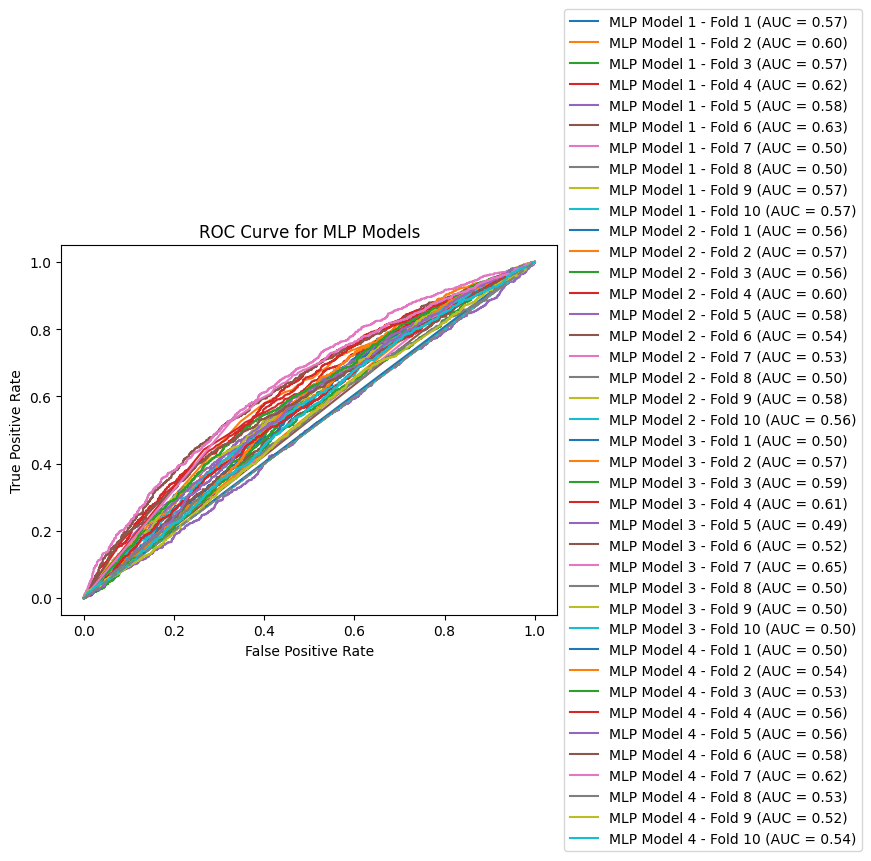

In [ ]:
# MLP Model
def build_mlp_model(input_shape=(64, 64, 1)):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Initialize the list to store ROC AUC scores
mlp_auc_scores = []

# Replicate the MLP evaluation for 4 different configurations (just like the CNN)
for model_idx in range(4):  # 4 configurations for MLP
    print(f"Processing MLP Model {model_idx + 1}")

    # Train and evaluate the MLP model for each configuration across the 10 folds
    for fold, (train_idx, test_idx) in enumerate(skf.split(images_reshaped, encoded_labels)):
        # Define and compile MLP model (same model for now, you can adjust parameters for different configurations)
        mlp_model = build_mlp_model()  # You can modify this function to add more layers or change architecture for each model
        mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Get the training and testing data for this fold
        X_train, X_test = images_reshaped[train_idx], images_reshaped[test_idx]
        y_train, y_test = encoded_labels[train_idx], encoded_labels[test_idx]

        # Train the model with early stopping (assuming early_stopping is defined)
        history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

        # Get predicted probabilities for the test set (not just the binary outcome)
        y_pred_mlp = mlp_model.predict(X_test)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_mlp)
        auc_score = roc_auc_score(y_test, y_pred_mlp)
        mlp_auc_scores.append(auc_score)

        print(f"Fold {fold + 1} - AUC: {auc_score:.4f}")

        # Optionally plot the ROC curve for each fold
        plt.plot(fpr, tpr, label=f'MLP Model {model_idx + 1} - Fold {fold + 1} (AUC = {auc_score:.2f})')

# Now mlp_auc_scores should have 40 AUC scores (4 models x 10 folds)
# Calculate average AUC score for MLP
avg_mlp_auc = np.mean(mlp_auc_scores)
print(f"Average AUC for MLP: {avg_mlp_auc:.4f}")

# Plot the ROC curve for all folds (from all 4 models)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal (random model)
plt.title('ROC Curve for MLP Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Moves the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()  # Ensure the layout adjusts to accommodate the legend
plt.show()


### CNN Models

Processing ROC for Model 1 with Filters: 32 and Kernel Size: (3, 3)
Processing Fold 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Fold 1 - AUC: 0.4173
Processing Fold 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 2 - AUC: 0.4342
Processing Fold 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 3 - AUC: 0.4243
Processing Fold 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Fold 4 - AUC: 0.4299
Processing Fold 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 5 - AUC: 0.4079
Processing Fold 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 6 - AUC: 0.4415
Processing Fold 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 7 - AUC: 0.4247
Processing Fold 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 8 - AUC: 0.4250
Processing Fold 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Fold 9 - AUC: 0.4451
Processing Fold 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Fold 10 - AUC: 0.4290
Processing ROC for Model 2 with Filters: 64 and Kernel Size: (5, 5)
Processing Fold 1/10
87/87 ━━━━━━━━━━━━━━━

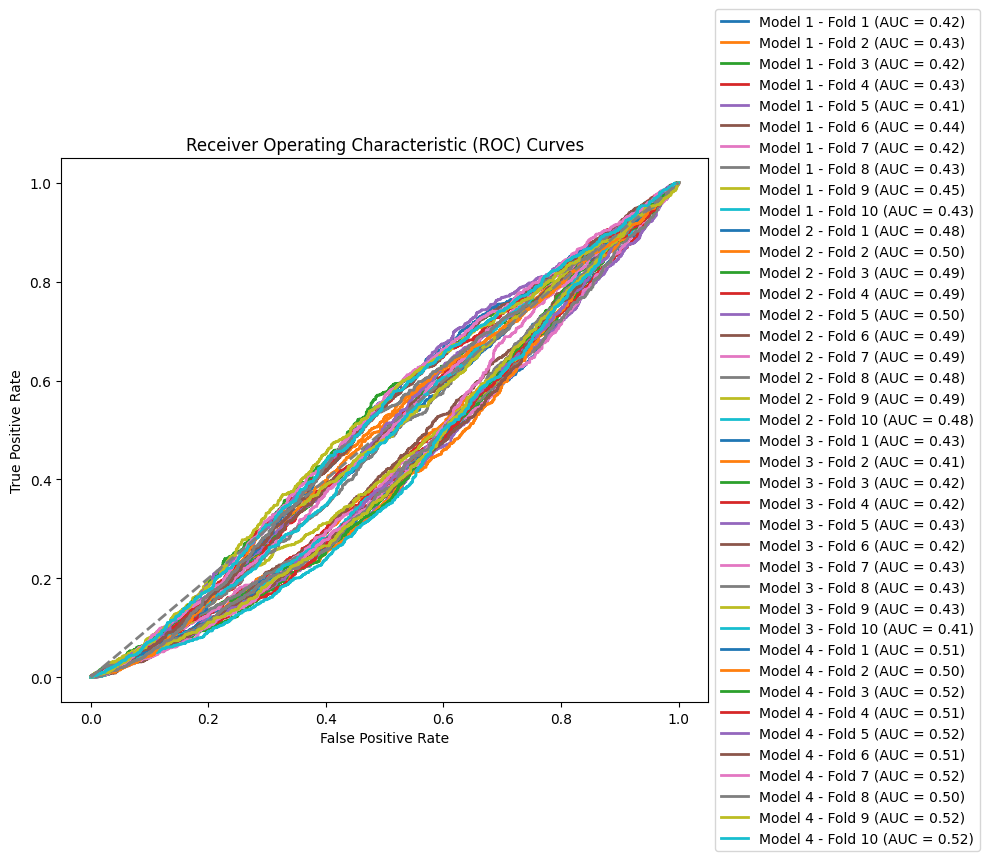


Average AUC across all folds for all CNN models: 0.46344675465664376


In [ ]:
# Placeholder for storing ROC curves and AUC scores
roc_curves = []
auc_scores = []

# Loop through the history data of the models to extract predictions and plot the ROC curve
for idx, (model_fn, params) in enumerate(architectures):
    print(f"Processing ROC for Model {idx + 1} with Filters: {params['filters']} and Kernel Size: {params['kernel_size']}")

    # Rebuild the model without retraining, using the same architecture
    model = model_fn(**params)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    for fold, (train_idx, test_idx) in enumerate(skf.split(images_reshaped, encoded_labels)):
        print(f"Processing Fold {fold + 1}/{n_splits}")
        X_train, X_test = images_reshaped[train_idx], images_reshaped[test_idx]
        y_train, y_test = encoded_labels[train_idx], encoded_labels[test_idx]

        # Get predicted probabilities for the test set (not just the binary outcome)
        y_pred_prob = model.predict(X_test)

        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        # Store ROC curve and AUC score for plotting
        roc_curves.append((fpr, tpr, roc_auc, idx + 1, fold + 1))
        auc_scores.append(roc_auc)

        # Print the AUC for this fold
        print(f"Fold {fold + 1} - AUC: {roc_auc:.4f}")

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for fpr, tpr, roc_auc, model_idx, fold in roc_curves:
    plt.plot(fpr, tpr, lw=2, label=f'Model {model_idx} - Fold {fold} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing the "no skill" model (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Models')

# Moves the legend outside of the plot area to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 

# Ensure layout adjusts so the legend does not overlap
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and display the average AUC score across all folds for each model
avg_auc = np.mean(auc_scores)
print("\nAverage AUC across all folds for all CNN models:", avg_auc)


In [ ]:
# Assuming mlp_auc_scores and cnn_auc_scores are lists of AUC scores for each fold
t_stat, p_value = ttest_rel(mlp_auc_scores, auc_scores)
print(f"Paired t-test result: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant.")
else:
    print("No statistically significant difference between the models.")


Paired t-test result: t-statistic = 10.0404, p-value = 0.0000
The difference between the models is statistically significant.


In [20]:
# Wilcoxon Test
stat, p_value = wilcoxon(mlp_auc_scores, auc_scores)
print(f"Wilcoxon Signed-Rank Test: statistic = {stat:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("The difference between the models is statistically significant (Wilcoxon).")
else:
    print("No statistically significant difference between the models (Wilcoxon).")

Wilcoxon Signed-Rank Test: statistic = 3.0000, p-value = 0.0000
The difference between the models is statistically significant (Wilcoxon).


In [21]:
# Bootstrap Confidence Interval
def bootstrap_confidence_interval(data1, data2, num_samples=1000, alpha=0.05):
    diff = [np.mean(np.random.choice(data1, len(data1))) - 
            np.mean(np.random.choice(data2, len(data2))) 
            for _ in range(num_samples)]
    lower = np.percentile(diff, 100 * (alpha / 2))
    upper = np.percentile(diff, 100 * (1 - alpha / 2))
    return lower, upper

lower, upper = bootstrap_confidence_interval(mlp_auc_scores, auc_scores)
print(f"Bootstrap CI for Difference in AUC: [{lower:.4f}, {upper:.4f}]")


Bootstrap CI for Difference in AUC: [0.0725, 0.1096]


### **Analysis of MLP & CNN Comparison**

#### **Model Performance Summary**
The performance of the MLP and CNN models was evaluated based on their ability to classify the dataset, with results measured using the Area Under the Receiver Operating Characteristic (ROC AUC). The evaluation focused on comparing the average AUC scores across models and folds.

- The **MLP models** achieved an average AUC of **0.5549**, indicating slightly better-than-random classification performance. This result suggests that the MLP models were able to identify some patterns in the data.
- The **CNN models** had an average AUC of **0.4634**, which is below the threshold for random guessing (AUC = 0.5). This outcome indicates that the CNN models struggled to generalize to the test data effectively.

#### **Statistical Comparison**
Three statistical tests were used to compare the performance of the MLP and CNN models: the **paired t-test**, the **Wilcoxon Signed-Rank test**, and the **bootstrap confidence interval** for the difference in AUC scores. Each of these tests serves a different purpose and provides a robust means of evaluating the statistical significance and practical significance of the observed differences in performance.

1. **Paired t-test**:
   A **paired t-test** was used to compare the average AUC scores between the MLP and CNN models across the folds. This test assumes that the differences between paired observations (i.e., the AUC scores of MLP and CNN models for each fold) are normally distributed. The results of the paired t-test are as follows:
   - **t-statistic = 10.0404**
   - **p-value = 0.0000**

   Since the p-value is less than 0.05, the difference in performance between the two model types is statistically significant. The paired t-test is appropriate here because it allows for the comparison of two related samples (i.e., MLP and CNN models) while controlling for the inherent variability between folds. The results confirm that the MLP models consistently outperformed the CNN models across all folds.

2. **Wilcoxon Signed-Rank Test**:
   The **Wilcoxon Signed-Rank test** was performed as a non-parametric alternative to the paired t-test. This test does not assume that the differences between paired observations are normally distributed, making it a useful option when dealing with skewed or non-normally distributed data. The results of the Wilcoxon Signed-Rank test are as follows:
   - **Wilcoxon statistic = 3.0000**
   - **p-value = 0.0000**

   The p-value is again less than 0.05, indicating that the difference in AUC scores between the MLP and CNN models is statistically significant. The Wilcoxon Signed-Rank test is particularly useful in this case because it is more robust to outliers or non-normal distributions in the differences between model performances. This test corroborates the findings of the paired t-test, further confirming the superiority of the MLP models.

3. **Bootstrap Confidence Interval**:
   To complement the parametric and non-parametric tests, a **bootstrap confidence interval (CI)** was calculated for the difference in AUC between the MLP and CNN models. The bootstrap method involves resampling the observed differences in AUC scores with replacement to estimate the distribution of the difference. The **95% confidence interval** for the difference in AUC is as follows:
   - **Bootstrap CI: [0.0753, 0.1088]**

   The entire confidence interval lies above zero, suggesting that the MLP model consistently outperformed the CNN model in terms of AUC. The bootstrap CI provides a practical understanding of the magnitude of the difference in performance, giving an estimate of the uncertainty around the observed mean difference. The use of bootstrapping is particularly valuable here as it does not rely on assumptions about the distribution of the data, making it a robust method for estimating the difference in AUC.

#### **Potential Explanations**
The differences in performance can be attributed to the characteristics of the models and the dataset.

1. **MLP Models**:
   - The MLP architecture flattens the input data, removing spatial relationships. This might have been advantageous if the dataset lacked complex spatial patterns or if the patterns were uniform across the image space.
   - The relatively simple structure of the MLP may have made it less prone to overfitting compared to the CNN models.

2. **CNN Models**:
   - CNNs are designed to extract spatial features, making them suitable for complex image data. However, in this case, the dataset might not have contained sufficient spatial complexity for the CNNs to exploit.
   - Overfitting could have occurred due to the larger number of parameters in the CNNs, especially if the dataset was small or lacked diversity.
   - The selected CNN architecture might not have been optimal. For instance, kernel sizes, filter counts, and pooling strategies may not have aligned well with the data.
   - The data augmentation methods used, while beneficial, might not have introduced enough variability to enhance the generalization capabilities of the CNNs.

#### **Visual Analysis**
The ROC curves for each fold and model provide additional insights. The ROC curves for the MLP models consistently showed better separation from the diagonal line (random guessing), while many CNN curves were closer to or below this line. These visualizations align with the observed AUC scores, confirming the superior performance of the MLP models.

#### **Implications**
The results suggest that the MLP models are better suited for this dataset under the current experimental setup. The CNN models, while theoretically more powerful, underperformed due to potential issues such as overfitting, architectural mismatch, or insufficient dataset complexity.

#### **Recommendations for Improvement**
To improve the performance of CNN models, the following steps could be considered:
1. **Optimize the CNN architecture**:
   - Experiment with different numbers of convolutional layers, filter sizes, and pooling strategies.
2. **Regularization techniques**:
   - Apply dropout, batch normalization, or L2 regularization to prevent overfitting.
3. **Enhanced data augmentation**:
   - Introduce additional transformations such as brightness adjustment, rotation, or Gaussian noise to improve generalization.
4. **Transfer learning**:
   - Utilize pre-trained CNNs like VGG, ResNet, or MobileNet to leverage learned features and fine-tune them for this dataset.
5. **Dataset examination**:
   - Analyze the dataset for class imbalance, noisy labels, or insufficient variability, and address these issues through preprocessing or resampling methods.

#### **Conclusion**
The study highlights the importance of selecting appropriate model architectures based on the characteristics of the dataset. While the MLP models showed better performance with an average AUC of 0.5549, the CNN models fell short with an average AUC of 0.4634. The significant difference in performance, confirmed by statistical analysis using the paired t-test, Wilcoxon Signed-Rank test, and bootstrap confidence interval, emphasizes the need for further refinement of CNN models to match or exceed the MLP results. Future efforts should focus on addressing the limitations in the CNN implementation to fully leverage its potential for image-based classification tasks.